<a href="https://colab.research.google.com/github/slytechiefrommagentashore/cs302_AritificialIntelligence/blob/main/tsp_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Coordinates and euclidean distance

In [16]:
class Coordinate:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    @staticmethod
    # Euclidean distance between two points
    def cal_dist(a, b):
        return np.sqrt(((a.x - b.x) ** 2) + ((a.y - b.y) ** 2))

    @staticmethod
    def cal_tot_dist(coordinate):
        # Initializing distance
        distance = 0

        # Calculating the distance a pair of points
        for f, s in zip(coordinate[:-1], coordinate[1:]):
            distance = distance + Coordinate.cal_dist(f, s)
        # Add the distance between the first point and the last point to complete the cycle
        distance = distance + Coordinate.cal_dist(coordinate[0], coordinate[-1])

        return distance


# Generate random nodes

In [24]:
# Driver functions and inputs
coordinate = []
x = []
y = []

# Change the dimension
dim = 50

# Inserting coordinates into the class objects
for i in range(dim):
    object = Coordinate(np.random.uniform(), np.random.uniform())
    x.append(object.x)
    y.append(object.y)
    coordinate.append(object)


# Rajasthan Tourist Places


In [26]:
# Get the x and y coordinates of 25 places
df = pd.read_csv("/content/drive/MyDrive/Ai lab/Lab 3 Assignment _TSP problem /Rajasthan 25 locations/rajasthan.csv")
x = df["x"]
y = df["y"]

dim = len(x)
coordinate = []

for i in range(dim):
    object = Coordinate(x[i], y[i])
    coordinate.append(object)

# VLSI datasets


In [36]:
def get_data(option=1):

    if (option == 1):
        file = "/content/drive/MyDrive/Ai lab/Lab 3 Assignment _TSP problem /XQF131/xqf131.tsp"

    elif (option == 2):
        file = "/content/drive/MyDrive/Ai lab/Lab 3 Assignment _TSP problem /XQG237/xqg237.tsp"

    elif (option == 3):
        file = "/content/drive/MyDrive/Ai lab/Lab 3 Assignment _TSP problem /PMA343/pma343.tsp"

    elif (option == 4):
        file = "/content/drive/MyDrive/Ai lab/Lab 3 Assignment _TSP problem /PKA379/pka379.tsp"

    elif (option == 5):
        file = "/content/drive/MyDrive/Ai lab/Lab 3 Assignment _TSP problem /BLC380/bcl380.tsp"

    elif (option == 6):
        file = "/content/drive/MyDrive/Ai lab/Lab 3 Assignment _TSP problem /XQL662/xql662.tsp"

    infile = open(file, "r")
    content = infile.readline().strip().split()

    while content[0] != "NODE_COORD_SECTION":
        if content[0] == "DIMENSION":
            dimension = content[2]
        content = infile.readline().strip().split()
    arr_x = []
    arr_y = []

    # Fill the x, y coordinates into the arr_x, arr_y
    for i in range(0, int(dimension)):
        s, x, y = infile.readline().strip().split()[:]
        arr_x.append(float(x))
        arr_y.append(float(y))

    # Close the file
    infile.close()
    return dimension, arr_x, arr_y

In [32]:
x = []
y = []
coordinate = []
# "Cities": "Options"
#  131    :   1
#  200    :   2
#  343    :   3
#  379    :   4
#  380    :   5

# Enter the option (parameter) here 👇
dim, x, y = get_data(5)

# Inserting co-ordinates into the class objects
for i in range(len(x)):
    object = Coordinate(x[i], y[i])
    coordinate.append(object)


# Simulated Annealing

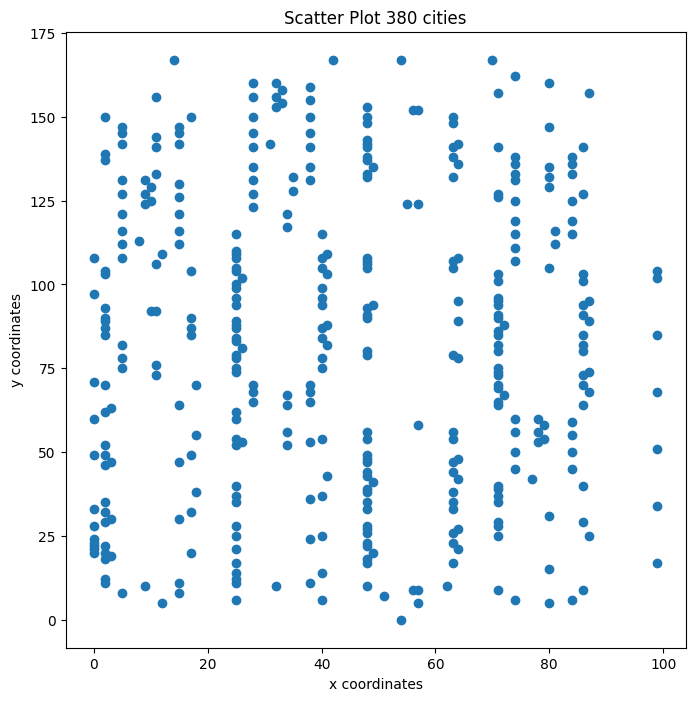

Percentage completed: 35%

<ipython-input-33-ec2899e2cbf8>:67: RuntimeWarning: overflow encountered in exp
  if x < (1/(1 + np.exp((cost0 - cost1)*(-1) / T))):


Percentage completed: 99%
Initial cost:  10013.54006898525
Final cost after simulated annealing:  3523.5294475507376


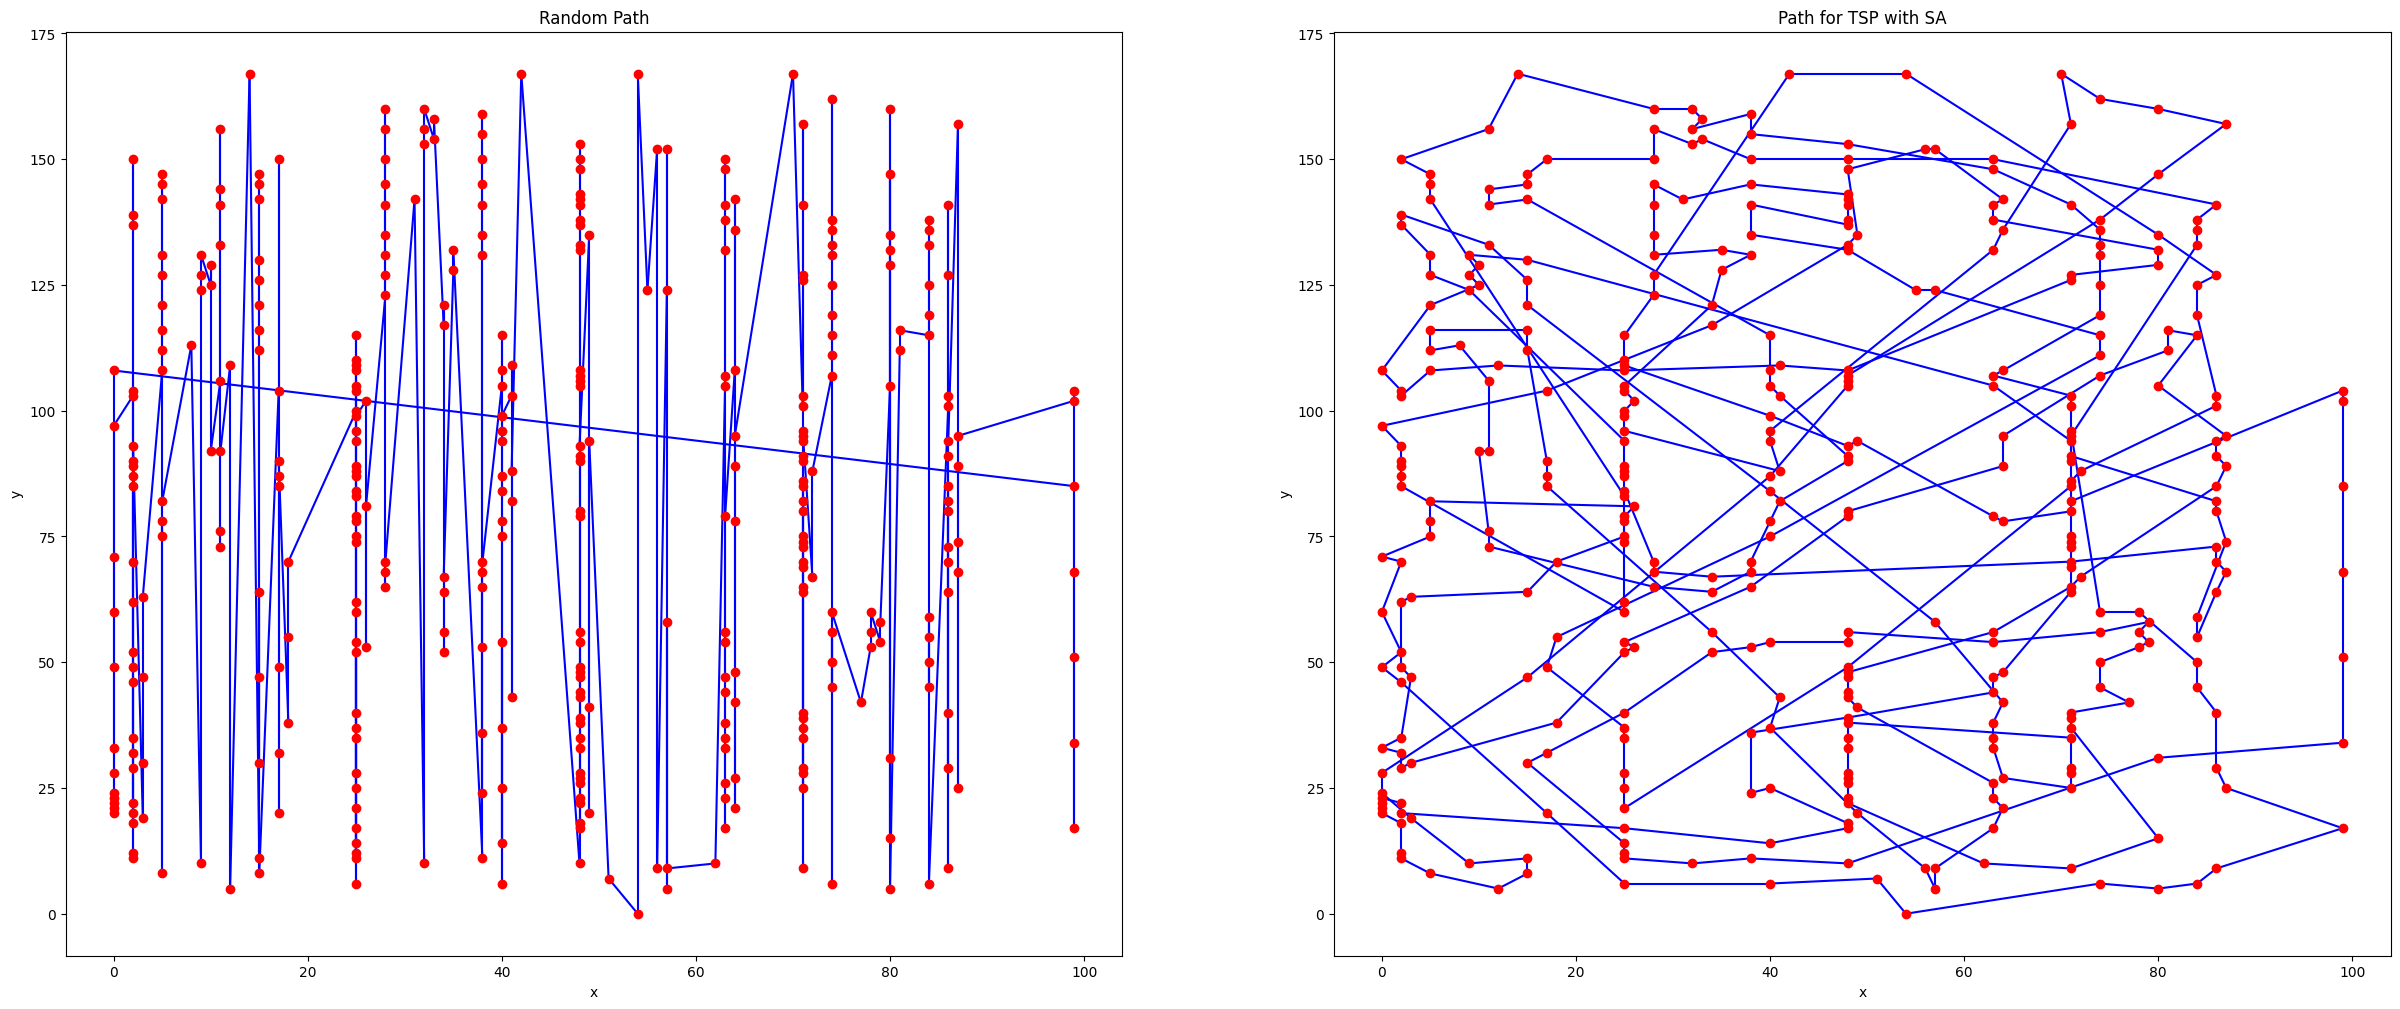

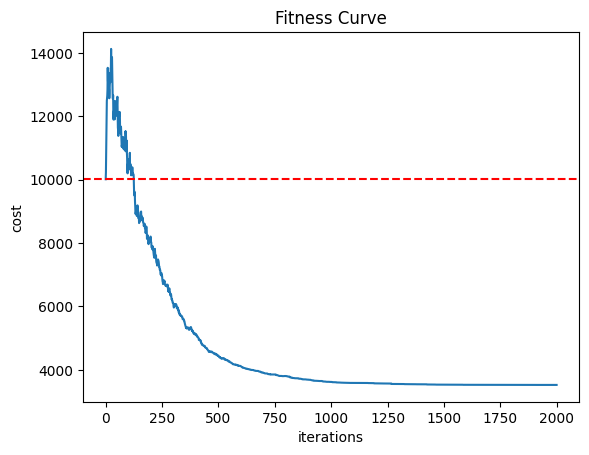

In [33]:
# Driver functions and inputs
# Scatter plot x, y coordinates
plt.figure(figsize=(8, 8))
plt.scatter(x, y)
plt.title("Scatter Plot %s cities" % (dim))
plt.xlabel("x coordinates")
plt.ylabel("y coordinates")
plt.show()

# Plotting coordinates
fig = plt.figure(figsize=(30, 12))
axes1 = fig.add_subplot(121)
axes2 = fig.add_subplot(122)
axes1.title.set_text("Random Path")
axes2.title.set_text("Path for TSP with SA")

for f, s in zip(coordinate[:-1], coordinate[1:]):
    axes1.plot([f.x, s.x], [f.y, s.y], "b")
axes1.plot(
    [coordinate[0].x, coordinate[-1].x], [coordinate[0].y, coordinate[-1].y], "b"
)
axes1.set_xlabel("x")
axes1.set_ylabel("y")
for coor in coordinate:
    axes1.plot(coor.x, coor.y, "ro")

# Simluated Annealing
costs = []
cost0 = Coordinate.cal_tot_dist(coordinate)
initial_cost = cost0

# Temperature
T = 30
factor = 0.995

# Increase the no. of iterations for VLSI datasets to 5000
iterations = 2000

for i in range(iterations):
    costs.append(cost0)
    sys.stdout.write("\r")
    sys.stdout.write("Percentage completed: %d%%" % ((i * 100)/ iterations))
    sys.stdout.flush()

    # Iterate to find a good solution for each value of T
    for j in range(500):
        c1, c2 = np.random.randint(0, len(coordinate), size=2)

        # Exchange coordinates
        temp = coordinate[c1]
        coordinate[c1] = coordinate[c2]
        coordinate[c2] = temp

        # Calculate the new cost
        cost1 = Coordinate.cal_tot_dist(coordinate)

        # Check if new cost is smaller than the previous cost
        if cost1 < cost0:
            cost0 = cost1

        # If the new cost is greater than the previous cost
        else:
            # Select a random value
            x = np.random.uniform()

            # accept with probability p
            if x < (1/(1 + np.exp((cost0 - cost1)*(-1) / T))):
                cost0 = cost1

            # Exchange coordinates
            else:
                temp = coordinate[c1]
                coordinate[c1] = coordinate[c2]
                coordinate[c2] = temp

    # Reduce the temperature
    T = T * factor

print("\nInitial cost: ", initial_cost)
print("Final cost after simulated annealing: ", cost0)

# Plotting the results after running simulated annealing
for f, s in zip(coordinate[:-1], coordinate[1:]):
    axes2.plot([f.x, s.x], [f.y, s.y], "b")
axes2.plot(
    [coordinate[0].x, coordinate[-1].x], [coordinate[0].y, coordinate[-1].y], "b"
)

for coor in coordinate:
    axes2.plot(coor.x, coor.y, "ro")
axes2.set_xlabel("x")
axes2.set_ylabel("y")
plt.show()

print("\n\n")
# Plot the fitness curve of the cost vs iterations
plt.plot(np.arange(iterations), costs)
plt.axhline(y=initial_cost, color="r", linestyle="--")
plt.title("Fitness Curve")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.show()

Simulated Anneleaning for rajasthan

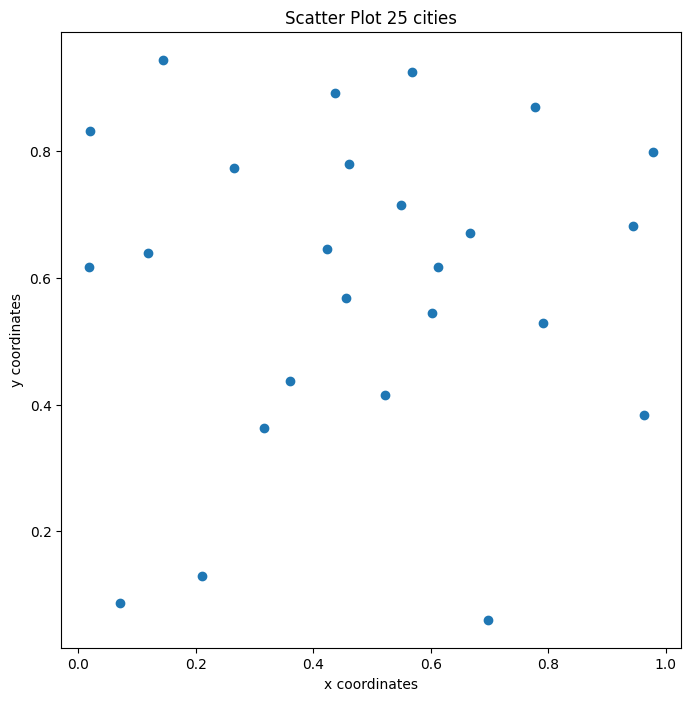

Percentage completed: 88%

<ipython-input-46-ab6f75f44f55>:84: RuntimeWarning: overflow encountered in exp
  if x < (1 / (1 + np.exp((cost0 - cost1) * (-1) / T))):


Percentage completed: 99%
Initial cost:  11.814598631595628
Final cost after simulated annealing:  4.922789970783609


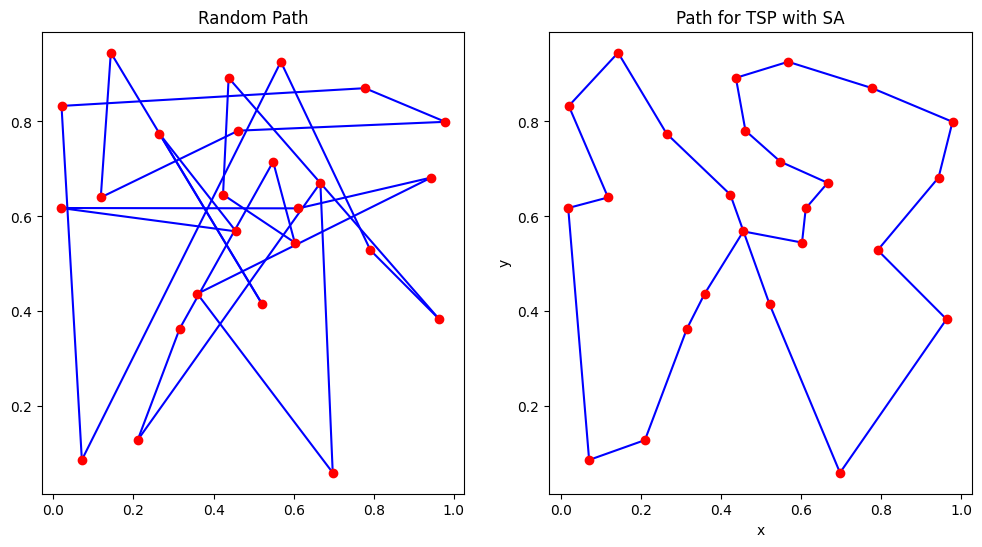

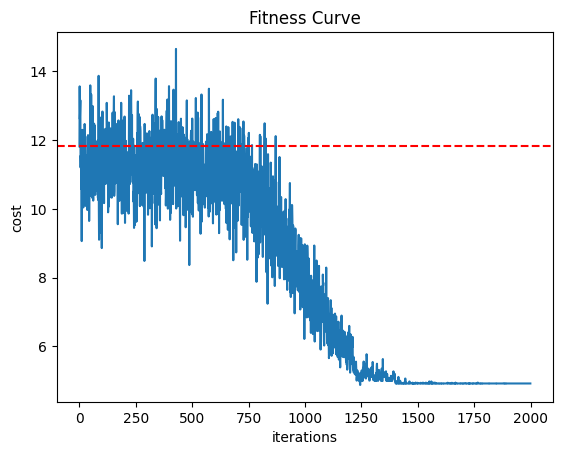

In [46]:
# Scatter plot x, y coordinates for 25 cities
x = [c.x for c in coordinate]
y = [c.y for c in coordinate]
plt.figure(figsize=(8, 8))
plt.scatter(x, y)
plt.title("Scatter Plot 25 cities")
plt.xlabel("x coordinates")
plt.ylabel("y coordinates")
plt.show()

# Plotting random path
fig = plt.figure(figsize=(12, 6))
axes1 = fig.add_subplot(121)
axes2 = fig.add_subplot(122)
axes1.title.set_text("Random Path")
axes2.title.set_text("Path for TSP with SA")

for f, s in zip(coordinate[:-1], coordinate[1:]):
    axes1.plot([f.x, s.x], [f.y, s.y], "b")
axes1.plot([coordinate[0].x, coordinate[-1].x], [coordinate[0].y, coordinate[-1].y], "b")
for coor in coordinate:
    axes1.plot(coor.x, coor.y, "ro")

# Simulated Annealing for 25 cities
costs = []
cost0 = Coordinate.cal_tot_dist(coordinate)
initial_cost = cost0

# Temperature and iterations
T = 30
factor = 0.995
iterations = 2000

# Simulated Annealing algorithm for 25 cities
for i in range(iterations):
    costs.append(cost0)
    sys.stdout.write("\r")
    sys.stdout.write("Percentage completed: %d%%" % ((i * 100) / iterations))
    sys.stdout.flush()

    for j in range(500):
        c1, c2 = np.random.randint(0, len(coordinate), size=2)
        temp = coordinate[c1]
        coordinate[c1] = coordinate[c2]
        coordinate[c2] = temp
        cost1 = Coordinate.cal_tot_dist(coordinate)

        if cost1 < cost0:
            cost0 = cost1
        else:
            x = np.random.uniform()
            if x < (1 / (1 + np.exp((cost0 - cost1) * (-1) / T))):
                cost0 = cost1
            else:
                temp = coordinate[c1]
                coordinate[c1] = coordinate[c2]
                coordinate[c2] = temp

    T = T * factor

print("\nInitial cost: ", initial_cost)
print("Final cost after simulated annealing: ", cost0)

# Plotting the results after running simulated annealing for 25 cities
for f, s in zip(coordinate[:-1], coordinate[1:]):
    axes2.plot([f.x, s.x], [f.y, s.y], "b")
axes2.plot([coordinate[0].x, coordinate[-1].x], [coordinate[0].y, coordinate[-1].y], "b")
for coor in coordinate:
    axes2.plot(coor.x, coor.y, "ro")

axes2.set_xlabel("x")
axes2.set_ylabel("y")
plt.show()

# Plot the fitness curve of the cost vs iterations
plt.plot(np.arange(iterations), costs)
plt.axhline(y=initial_cost, color="r", linestyle="--")
plt.title("Fitness Curve")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.show()


# Comparison of costs

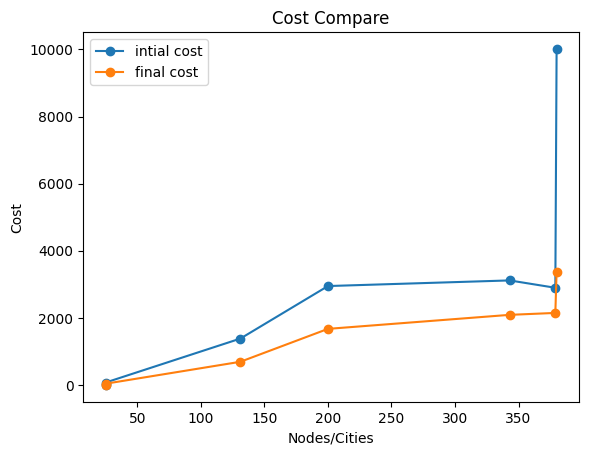

In [42]:
# Comparing initial cost with final cost (optimised route) for
# - 25 random numbers
# - 25 Rajasthan places
# - 131 cities
# - 200 cities
# - 343 cities
# - 379 cities
# - 380 cities

# Readings
nodes = [25, 25, 131, 200, 343, 379, 380]
cost_initial = [13.956, 76.127, 1383.916, 2949.579, 3117.179, 2898.213, 10013.540]
cost_final = [4.103, 40.486, 693.312, 1673.994, 2091.522, 2148.960, 3378.900]

plt.plot(nodes, cost_initial, nodes, cost_final, marker = "o")
plt.legend(["intial cost", "final cost"])
plt.title("Cost Compare")
plt.xlabel("Nodes/Cities")
plt.ylabel("Cost")
plt.show()

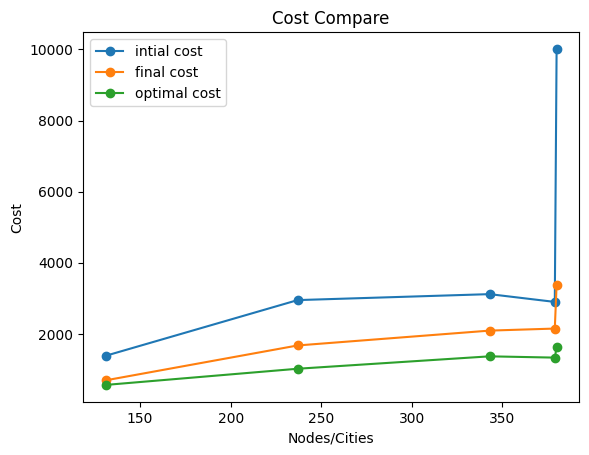

In [35]:
# VLSI datasets
# Comparing initial cost with calculated final cost (optimised route) and optimal cost
# - 131 cities
# - 237 cities
# - 343 cities
# - 379 cities
# - 380 cities

# Readings
nodes = [125, 237, 343, 379, 380]
cost_initial = [1383.916, 2949.579, 3117.179, 2898.213, 10013.540]
cost_final = [693.312, 1673.994, 2091.522, 2148.960, 3378.900]

# Data from VLSI (logs of computation)
cost_optimal = [564, 1019, 1368, 1332, 1621]

plt.plot(nodes, cost_initial, nodes, cost_final, nodes, cost_optimal, marker = "o")
plt.legend(["intial cost", "final cost", "optimal cost"])
plt.title("Cost Compare")
plt.xlabel("Nodes/Cities")
plt.ylabel("Cost")
plt.show()

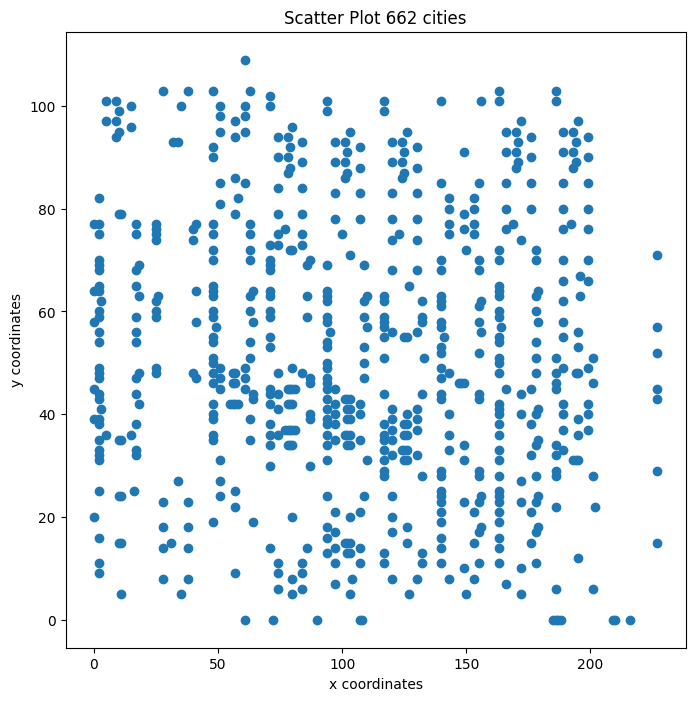

Percentage completed: 83%

<ipython-input-51-a7e2d3322d86>:111: RuntimeWarning: overflow encountered in exp
  if x < (1 / (1 + np.exp((cost0 - cost1) * (-1) / T))):


Percentage completed: 99%
Initial cost:  335.590254886472
Final cost after simulated annealing:  51.466730351642454


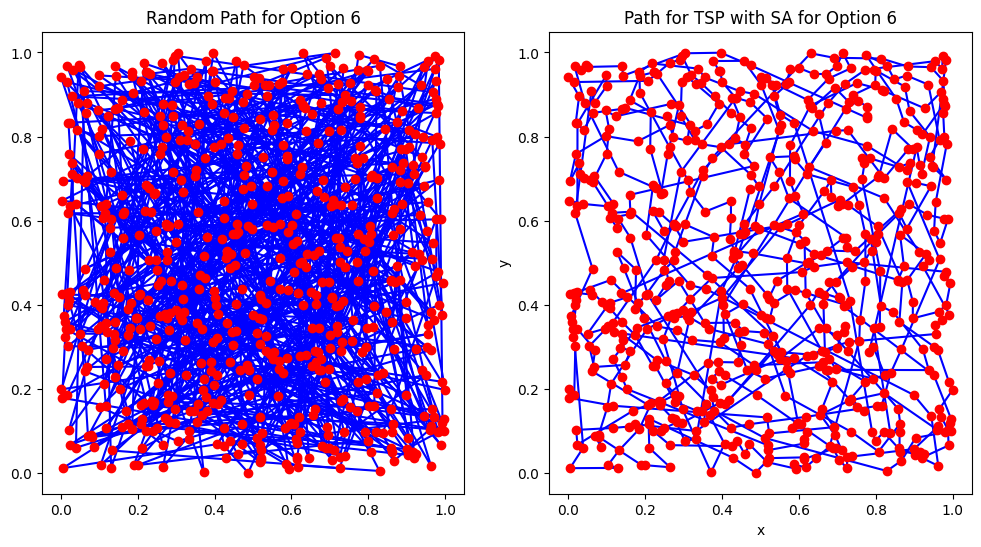

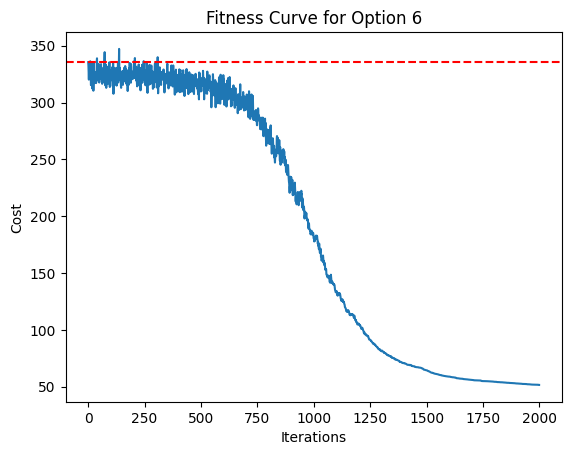

In [51]:
import matplotlib.pyplot as plt

# Get data for option 6
dim, x, y = get_data(6)

# Scatter plot x, y coordinates
plt.figure(figsize=(8, 8))
plt.scatter(x, y)
plt.title("Scatter Plot %s cities" % (dim))
plt.xlabel("x coordinates")
plt.ylabel("y coordinates")
plt.show()

# Plot random path for option 6
fig = plt.figure(figsize=(12, 6))
axes1 = fig.add_subplot(121)
axes1.title.set_text("Random Path for Option 6")

np.random.seed(0)
coordinate = [Coordinate(np.random.uniform(), np.random.uniform()) for _ in range(len(x))]

for f, s in zip(coordinate[:-1], coordinate[1:]):
    axes1.plot([f.x, s.x], [f.y, s.y], "b")
axes1.plot([coordinate[0].x, coordinate[-1].x], [coordinate[0].y, coordinate[-1].y], "b")
for coor in coordinate:
    axes1.plot(coor.x, coor.y, "ro")

# Simulated Annealing for option 6
costs = []
cost0 = Coordinate.cal_tot_dist(coordinate)
initial_cost = cost0

T = 30
factor = 0.995
iterations = 2000

for i in range(iterations):
    costs.append(cost0)
    sys.stdout.write("\r")
    sys.stdout.write("Percentage completed: %d%%" % ((i * 100) / iterations))
    sys.stdout.flush()

    for j in range(500):
        c1, c2 = np.random.randint(0, len(coordinate), size=2)
        temp = coordinate[c1]
        coordinate[c1] = coordinate[c2]
        coordinate[c2] = temp
        cost1 = Coordinate.cal_tot_dist(coordinate)

        if cost1 < cost0:
            cost0 = cost1
        else:
            x = np.random.uniform()
            if x < (1 / (1 + np.exp((cost0 - cost1) * (-1) / T))):
                cost0 = cost1
            else:
                temp = coordinate[c1]
                coordinate[c1] = coordinate[c2]
                coordinate[c2] = temp

    T = T * factor

print("\nInitial cost: ", initial_cost)
print("Final cost after simulated annealing: ", cost0)

# Plotting random path for option 6 after simulated annealing
axes2 = fig.add_subplot(122)
axes2.title.set_text("Path for TSP with SA for Option 6")

for f, s in zip(coordinate[:-1], coordinate[1:]):
    axes2.plot([f.x, s.x], [f.y, s.y], "b")
axes2.plot([coordinate[0].x, coordinate[-1].x], [coordinate[0].y, coordinate[-1].y], "b")
for coor in coordinate:
    axes2.plot(coor.x, coor.y, "ro")

axes2.set_xlabel("x")
axes2.set_ylabel("y")
plt.show()

# Plot the fitness curve of the cost vs iterations for option 6
plt.plot(np.arange(iterations), costs)
plt.axhline(y=initial_cost, color="r", linestyle="--")
plt.title("Fitness Curve for Option 6")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()
